In [26]:
from scipy import misc
face = misc.face(gray=True)

<ipython-input-26-a9d2fe9492aa>:2: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  face = misc.face(gray=True)


<ipython-input-27-e9fea963c90d>:2: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  face = misc.face(gray=True)


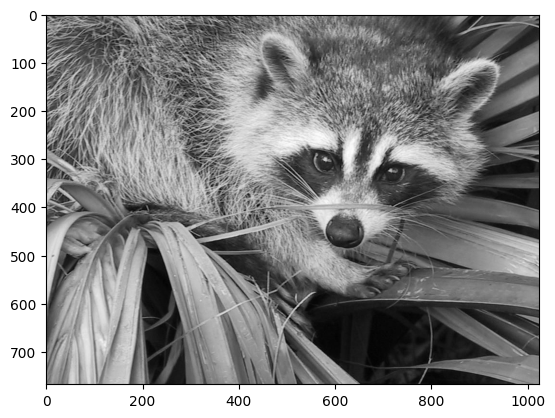

In [27]:
import matplotlib.pyplot as plt
face = misc.face(gray=True)
plt.imshow(face)

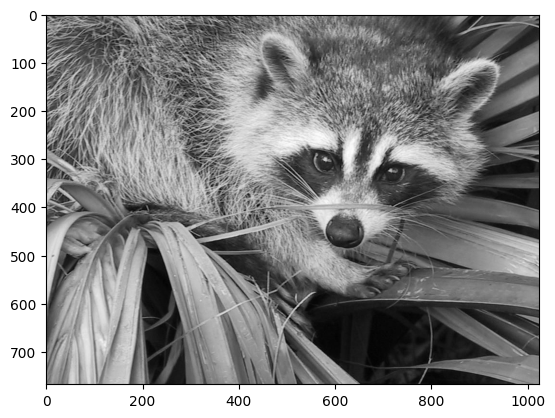

In [28]:
plt.imshow(face, cmap=plt.cm.gray)

In [29]:
crop_face = face[100:-100, 100:-100]

In [30]:
import numpy as np
sy, sx = face.shape
y, x = np.ogrid[0:sy, 0:sx] # x и y обозначают пиксели
y.shape, x.shape

centerx, centery = (660, 300) # центр изображения
mask = ((y - centery)**2 + (x - centerx)**2) > 230**2 # круг

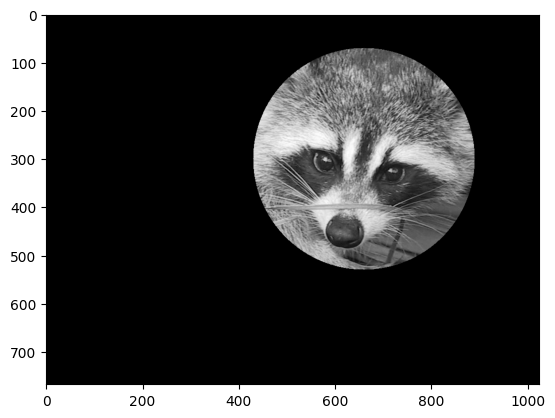

In [31]:
face[mask] = 0
plt.imshow(face, cmap=plt.cm.gray)

In [32]:
import requests
t_url = 'https://scipy-lectures.org/_downloads/populations.txt'
response = requests.get(target_url)
text_data = response.text

filename = 'populations.txt'

with open(filename, 'w') as file:
    file.write(text_data)

In [33]:
data = np.loadtxt(filename, skiprows=1)
year, hares, lynxes, carrots = data.T
populations = data[:,1:]
print("Mean:", populations.mean(axis=0))
print("std:", populations.std(axis=0))

max_years=np.argmax(populations,axis=0)
print("Макс. год:",year[max_years])

max_species=np.argmax(populations,axis=1)
species=np.array(['hare', 'lynx', 'carrot'])
print("Макс. видов:")
print(year)
print(species[max_species])

above50000 = np.any(populations>50000,axis=1)
print("Популяция превышает 50000",year[above50000])

top2=np.argsort(populations,axis=0)[:2]
print("Топ 2 года для каждого вида, когда его популяции были самыми низкими:")
print(year[top2])

haregrade=np.gradient(hares, 1.0)
lynxgrade=np.gradient(lynxes,1.0)
print("Разница",np.corrcoef(haregrade,lynxgrade)[0,1])

Mean: [34080.95238095 20166.66666667 42400.        ]
std: [20897.90645809 16254.59153691  3322.50622558]
Макс. год: [1903. 1904. 1900.]
Макс. видов:
[1900. 1901. 1902. 1903. 1904. 1905. 1906. 1907. 1908. 1909. 1910. 1911.
 1912. 1913. 1914. 1915. 1916. 1917. 1918. 1919. 1920.]
['carrot' 'carrot' 'hare' 'hare' 'lynx' 'lynx' 'carrot' 'carrot' 'carrot'
 'carrot' 'carrot' 'carrot' 'hare' 'hare' 'hare' 'lynx' 'carrot' 'carrot'
 'carrot' 'carrot' 'carrot']
Популяция превышает 50000 [1902. 1903. 1904. 1912. 1913. 1914. 1915.]
Топ 2 года для каждого вида, когда его популяции были самыми низкими:
[[1917. 1900. 1916.]
 [1916. 1901. 1903.]]
Разница -0.05136252586288724


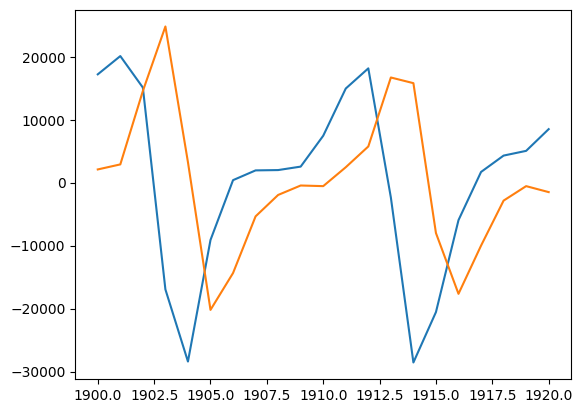

In [34]:
plt.plot(year,haregrade,year,lynxgrade)
plt.show()

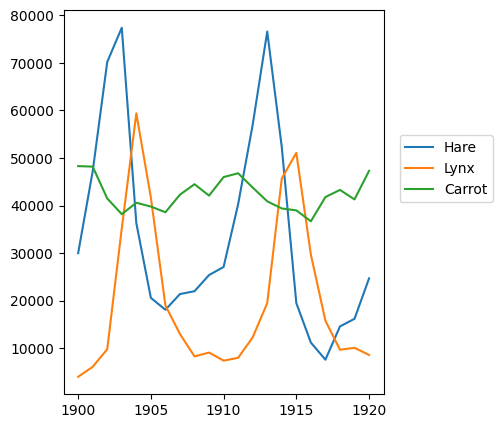

In [35]:
import matplotlib.pyplot as plt

plt.axes([0.2, 0.1, 0.5, 0.8])
plt.plot(year, hares, year, lynxes, year, carrots)
plt.legend(('Hare', 'Lynx', 'Carrot'), loc=(1.05, 0.5))

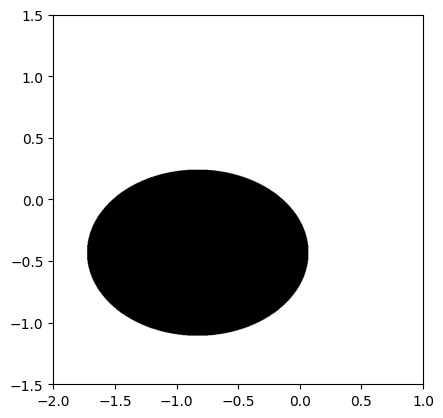

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import newaxis
plt.imshow(mask.T, extent=[-2, 1, -1.5, 1.5])

plt.gray()
plt.savefig('mandelbrot.png')

<ipython-input-37-50042b702fe2>:12: RuntimeWarning: overflow encountered in square
  z=z**2+c
<ipython-input-37-50042b702fe2>:12: RuntimeWarning: invalid value encountered in square
  z=z**2+c


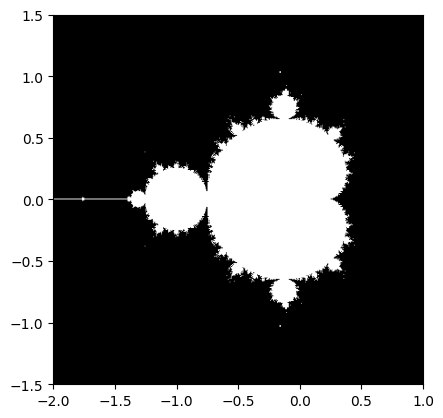

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import newaxis

def calculateMandelbrot(N_max,some_threshold,nx,ny):
  x=np.linspace(-2,1,nx)
  y=np.linspace(-1.5,1.5,ny)
  c=x[:,newaxis] +1j*y[newaxis,:]

  z=c
  for j in range(N_max):
    z=z**2+c

  mandelbrot_set=(abs(z) < some_threshold)

  return mandelbrot_set

mandelbrot_set=calculateMandelbrot(50,50,601,401)

plt.imshow(mandelbrot_set.T,extent=[-2,1,-1.5,1.5])
plt.gray()